In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel("C:/Users/Sree Vidya/Desktop/ISB/Term 2/Foundation Project 1/Training/final_pre-ml.xlsx")

In [2]:
df_var= df[["Vader Compound Score","Textblob Score","EmoLex Score", 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']]

from statsmodels import api as sm
from sklearn.model_selection import train_test_split

X = df_var
y = df["Close"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [3]:
#importing and training the data using LassoRegression Model 

from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred2 = lassoReg.predict(X_valid)

C:\Users\Sree Vidya\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [4]:
df_test = pd.read_excel("C:/Users/Sree Vidya/Desktop/ISB/Term 2/Foundation Project 1/Output/final.xlsx")

In [5]:
X_test= df_test[["Vader Compound Score","Textblob Score","EmoLex Score", 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']]
X_test

,Vader Compound Score,Textblob Score,EmoLex Score,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,-0.275,-0.066667,0,0,0,0,0,0.066667,0,0


In [7]:
y_pred_5 = lassoReg.predict(X_test)
y_pred_5

array([2172.76326185])

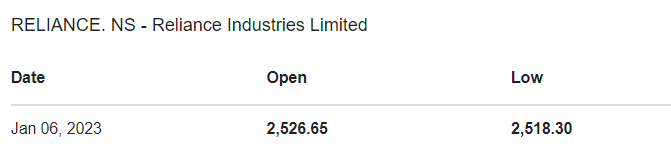

In [8]:
y_test_5 = [2526.65]

In [9]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [10]:
t1 = metrics.mean_absolute_error(y_test_5,y_pred_5)
t2 = np.mean(np.abs(y_test_5- y_pred_5)/y_test_5)*100
t3= metrics.mean_squared_error(y_test_5, y_pred_5)
t4 = np.sqrt(metrics.mean_squared_error(y_test_5, y_pred_5))

In [11]:
metrics=['MAE','MAPE', 'MSE', 'RMSE']
values_test=[t1,t2,t3,t4]

In [12]:
error = pd.DataFrame({'Errors' :metrics, 'Lasso Metrics for test case': values_test})
error

,Errors,Lasso Metrics for test case
0,MAE,353.886738
1,MAPE,14.006164
2,MSE,125235.823435
3,RMSE,353.886738
